In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("./data/train.csv")
val = pd.read_csv("./data/val.csv")
test = pd.read_csv("./data/test.csv")

In [6]:
train.head()

,Id,Text,Class
0,0,"Обустройство тротуаров, мостовых (в том числе ...",H
1,1,Въ издержкахъ же оныхъ вы имете присылать счет...,H
2,2,"Положи это туда, откуда взял.",H
3,3,Минстрой обозначил способы снижения энергоемко...,M
4,4,В конце 1873 года военный суд вынес решение по...,M


Посмотрим описание данных:

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129066 entries, 0 to 129065
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      129066 non-null  int64 
 1   Text    129066 non-null  object
 2   Class   129066 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [8]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21511 entries, 0 to 21510
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      21511 non-null  int64 
 1   Text    21511 non-null  object
 2   Class   21511 non-null  object
dtypes: int64(1), object(2)
memory usage: 504.3+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64533 entries, 0 to 64532
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      64533 non-null  int64 
 1   Text    64533 non-null  object
dtypes: int64(1), object(1)
memory usage: 1008.5+ KB


Видим, что все данные, что у нас есть -- это сами тексты, сгенерированные моделью MT и парафразерами или написанные человеком и собственно лейблы текстов. Пропусков в данных нет.

Посмотрим на распределие классов:

In [10]:
train.value_counts('Class')

Class
H    64535
M    64531
dtype: int64

In [11]:
val.value_counts('Class')

Class
H    10756
M    10755
dtype: int64

Видим, что распределение классов 50/50. Это значит, что при обучении у нас не будет байеса в сторону какого-то класса, что хорошо.

Теперь посмотрим на длины текстов:



In [12]:
print('Train:')
print('Минимальная длина (в символах):', train.Text.apply(len).min())
print('Средняя длина (в символах):', train.Text.apply(len).mean())
print('Максимальная длина (в символах):', train.Text.apply(len).max(), end='\n\n')
print('Минимальная длина (в токенах):', train.Text.str.split().apply(len).min())
print('Средняя длина (в токенах):', train.Text.str.split().apply(len).mean())
print('Максимальная длина (в токенах):', train.Text.str.split().apply(len).max())

Train:
Минимальная длина (в символах): 7
Средняя длина (в символах): 229.16644972339733
Максимальная длина (в символах): 3560

Минимальная длина (в токенах): 1
Средняя длина (в токенах): 30.958238420653
Максимальная длина (в токенах): 376


In [13]:
print('Val:')
print('Минимальная длина (в символах):', val.Text.apply(len).min())
print('Средняя длина (в символах):', val.Text.apply(len).mean())
print('Максимальная длина (в символах):', val.Text.apply(len).max(), end='\n\n')
print('Минимальная длина (в токенах):', val.Text.str.split().apply(len).min())
print('Средняя длина (в токенах):', val.Text.str.split().apply(len).mean())
print('Максимальная длина (в токенах):', val.Text.str.split().apply(len).max(), end='\n\n')

Val:
Минимальная длина (в символах): 12
Средняя длина (в символах): 229.3286225651992
Максимальная длина (в символах): 3498

Минимальная длина (в токенах): 1
Средняя длина (в токенах): 30.970154804518618
Максимальная длина (в токенах): 360



In [14]:
print('Test:')
print('Минимальная длина (в символах):', test.Text.apply(len).min())
print('Средняя длина (в символах):', test.Text.apply(len).mean())
print('Максимальная длина (в символах):', test.Text.apply(len).max(), end='\n\n')
print('Минимальная длина (в токенах):', test.Text.str.split().apply(len).min())
print('Средняя длина (в токенах):', test.Text.str.split().apply(len).mean())
print('Максимальная длина (в токенах):', test.Text.str.split().apply(len).max(), end='\n\n')

Test:
Минимальная длина (в символах): 6
Средняя длина (в символах): 229.71175987479273
Максимальная длина (в символах): 3209

Минимальная длина (в токенах): 1
Средняя длина (в токенах): 30.985232361737406
Максимальная длина (в токенах): 374



Как видим, данные сбалансированы по длине. Посмотрим на распределения длин:

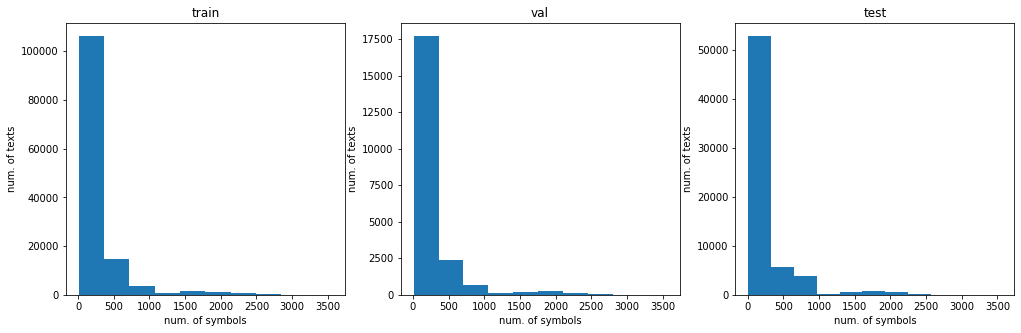

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5), sharex=True)

axs[0].hist(train.Text.apply(len))
axs[0].set(title='train',
           xlabel='num. of symbols',
           ylabel='num. of texts'
           )

axs[1].hist(val.Text.apply(len))
axs[1].set(title='val',
           xlabel='num. of symbols',
           ylabel='num. of texts'
           )

axs[2].hist(test.Text.apply(len))
axs[2].set(title='test',
           xlabel='num. of symbols',
           ylabel='num. of texts'
           )
plt.show()

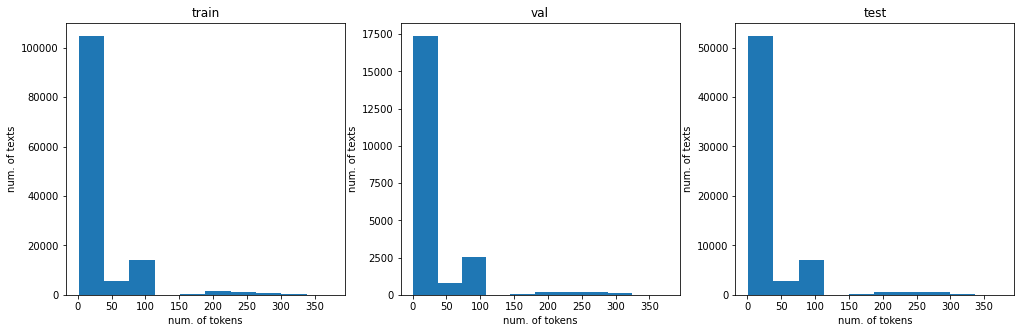

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5), sharex=True)

axs[0].hist(train.Text.str.split().apply(len))
axs[0].set(title='train',
           xlabel='num. of tokens',
           ylabel='num. of texts'
           )

axs[1].hist(val.Text.str.split().apply(len))
axs[1].set(title='val',
           xlabel='num. of tokens',
           ylabel='num. of texts'
           )

axs[2].hist(test.Text.str.split().apply(len))
axs[2].set(title='test',
           xlabel='num. of tokens',
           ylabel='num. of texts'
           )
plt.show()

Если смотреть на распределения длин, заметим, что большинство текстов довольно короткие (1-50 токенов), но у нас имеется хвост из меньшего количества данных большей длины с доп пиком в районе 80-120 токенов.

Давайте посмотрим на тексты длины 1:

In [17]:
train[train.Text.str.split().apply(len) == 1]

,Id,Text,Class
6484,10876,супруга_______________________________________...,H
48920,81476,zakupki.zapis.org/doc/148462-zakopis-dnya-chel...,M
64899,108146,дети:_________________________________________...,H
72562,120881,http://www.entlebucher-anzeiger.ch/2014/06/ski...,H
79372,132271,===Census/index,M
79649,132746,П.Д.ФРИЗЕН,H
89753,149491,http://www.transportaward.com/index.php/histor...,H
90038,149955,дети:_________________________________________...,H
91810,152888,president.go.kr/,H
99406,165658,ttp://twitter.com/TrumpTramp/status/1025219074...,M


In [18]:
val[val.Text.str.split().apply(len) == 1]

,Id,Text,Class
9297,91474,Приреализацииподпрограммывыделенаследующаяосно...,H
13598,135818,Е.И.Степанков,M
14129,141093,http://www.doctorwhotv.co.uk/mummy-on-the-orie...,H


In [19]:
test[test.Text.str.split().apply(len) == 1]

,Id,Text
19146,64373,====_&ure=_blanks
19458,65408,(комментарии.ua)
34954,116672,паспорт_______________________________________...
38276,127568,коты...кончают....????ЧТОЫ
43031,143522,воскр[есенье].
58240,194146,по____________________________________________...
61851,206178,Май/Июнь/Июль/Август
63562,211927,С.87).


Как видим, у нас есть некоторые тексты, которые сходу выглядят странно: ссылки, сокращения, части html страниц и тд. Причем большинство из них написаны человеком (точнее являются артефактами автоматического создания данных). В целом, их немного, так что это не должно быть не страшно.


Построим на длины по классам:

In [20]:
print('Train:')
print('H\tСредняя длина (в символах):', train[train.Class=='H'].Text.apply(len).mean())
print('M\tСредняя длина (в символах):', train[train.Class=='M'].Text.apply(len).mean(), end='\n\n')
print('H\tСредняя длина (в токенах):', train[train.Class=='H'].Text.str.split().apply(len).mean())
print('M\tСредняя длина (в токенах):', train[train.Class=='M'].Text.str.split().apply(len).mean())

Train:
H	Средняя длина (в символах): 221.472022933292
M	Средняя длина (в символах): 236.86135345802793

H	Средняя длина (в токенах): 30.069497172077167
M	Средняя длина (в токенах): 31.847034758488167


In [21]:
print('Val:')
print('H\tСредняя длина (в символах):', val[val.Class=='H'].Text.apply(len).mean())
print('M\tСредняя длина (в символах):', val[val.Class=='M'].Text.apply(len).mean(), end='\n\n')
print('H\tСредняя длина (в токенах):', val[val.Class=='H'].Text.str.split().apply(len).mean())
print('M\tСредняя длина (в токенах):', val[val.Class=='M'].Text.str.split().apply(len).mean())

Val:
H	Средняя длина (в символах): 221.47052807735218
M	Средняя длина (в символах): 237.18744769874476

H	Средняя длина (в токенах): 30.08478988471551
M	Средняя длина (в токенах): 31.855602045560204


Видим, что тексты, сгененрированные моделями, в среднем длиннее, хотя и не сильно. Посмотрим на распределение длин по классам:

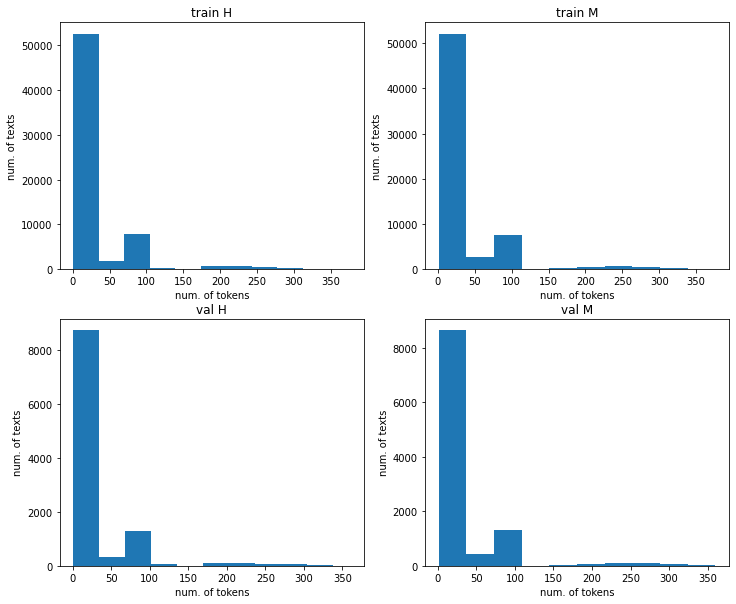

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex='row')

tr_human = train.Class == 'H'
tr_model = train.Class == 'M'

de_human = val.Class == 'H'
de_model = val.Class == 'M'

axs[0,0].hist(train[tr_human].Text.str.split().apply(len))
axs[0,0].set(title='train H',
             xlabel='num. of tokens',
             ylabel='num. of texts'
            )
axs[0,1].hist(train[tr_model].Text.str.split().apply(len))
axs[0,1].set(title='train M',
             xlabel='num. of tokens',
             ylabel='num. of texts'
            )


axs[1,0].hist(val[de_human].Text.str.split().apply(len))
axs[1,0].set(title='val H',
             xlabel='num. of tokens',
             ylabel='num. of texts'
            )

axs[1,1].hist(val[de_model].Text.str.split().apply(len))
axs[1,1].set(title='val M',
             xlabel='num. of tokens',
             ylabel='num. of texts'
            )
plt.show()

Как видим, распределения длин текстов между классами примерно одинаковы

Теперь посмотрим на разницу в написании текстов, а именно readability. А именно, посмотрим на Dale-Chall Readability, Flesch Reading Ease, Gunning Fog Index, показывающие сложность текста (синтаксическую и лексическую) и то, насколько просто его читать.

и посчитаем усредненное значение сложности по всем метрикам при помощи text_standart

In [31]:
!pip install -q textstat

     |████████████████████████████████| 101 kB 2.9 MB/s 
     |████████████████████████████████| 2.0 MB 11.2 MB/s 


In [41]:
import textstat

print('H\tdale_chall_readability_score:', train[tr_human].Text.apply(lambda x: textstat.dale_chall_readability_score(x)).mean())
print('M\tdale_chall_readability_score:', train[tr_model].Text.apply(lambda x: textstat.dale_chall_readability_score(x)).mean(), end='\n\n')

print('H\tflesch_reading_ease:', train[tr_human].Text.apply(lambda x: textstat.flesch_reading_ease(x)).mean())
print('M\tflesch_reading_ease:', train[tr_model].Text.apply(lambda x: textstat.flesch_reading_ease(x)).mean(), end='\n\n')

print('H\tgunning_fog:', train[tr_human].Text.apply(lambda x: textstat.gunning_fog(x)).mean())
print('M\tgunning_fog:', train[tr_model].Text.apply(lambda x: textstat.gunning_fog(x)).mean(), end='\n\n')

print('H\ttext_standard:', train[tr_human].Text.apply(lambda x: textstat.text_standard(x)).mode())
print('H\ttext_standard:', train[tr_model].Text.apply(lambda x: textstat.text_standard(x)).mode())

H	dale_chall_readability_score: 20.130638723173764
M	dale_chall_readability_score: 20.428218530629238

H	flesch_reading_ease: 90.49484837684844
M	flesch_reading_ease: 88.83139855263151

H	gunning_fog: 11.778161152862685
M	gunning_fog: 12.348772527932352

H	text_standard: 0    -1th and 0th grade
dtype: object
H	text_standard: 0    -1th and 0th grade
dtype: object


Судя по метрикам readability, или "читабельности", тексты людей и моделей примерно одинаковы по сложности. Причем довольно простые, судя по метрике text_standart